# Titanic: Machine Learning from Disaster
## CRISP-DM: Data Understanding
**Autor:** Wanderson Marques - wdsmarques@gmail.com

Esse Jupyter Notebook contém uma **análise exploratória** dos dados. Considerando a metodologia CRISP-DM, essa atividade refere-se à segunda fase, o entendimento dos dados. 

<img src="imgs/dataUnderstanding.jpg" />

### Carregar bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [2]:
# Exibir gráficos dentro do Jupyter Notebook
% matplotlib inline

# Definir tamanho padrão para os gráficos
rcParams['figure.figsize'] = 17, 4

### Carregar dataset

In [3]:
dataset = pd.read_csv('datasets/train.csv')

# Eliminar o identificador dos passageiros
dataset.drop(['PassengerId'], axis=1, inplace=True)

### Entender os atributos

>#### Data Dictionary:
>**survival**: Survival (0 = No, 1 = Yes) <br>
**pclass:** Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd) <br>
**sex:** Sex	
**Age:** Age in years	
**sibsp**: # of siblings / spouses aboard the Titanic	
**parch:** # of parents / children aboard the Titanic	
**ticket:** Ticket number	
**fare:** Passenger fare	
**cabin:** Cabin number	
**embarked:** Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

>#### Variable notes:
>**pclass:** A proxy for socio-economic status (SES)<br>
1st = Upper<br>
2nd = Middle<br>
3rd = Lower<br/>
**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5<br/>
**sibsp:** The dataset defines family relations in this way...<br>
Sibling = brother, sister, stepbrother, stepsister<br>
Spouse = husband, wife (mistresses and fiancés were ignored)<br/>
**parch:** The dataset defines family relations in this way...<br>
Parent = mother, father<br>
Child = daughter, son, stepdaughter, stepson<br>
Some children travelled only with a nanny, therefore parch=0 for them.

### Verificar tipos dos atributos

In [4]:
dataset.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

### Ver forma do dataset

In [5]:
dataset.shape

(891, 11)

In [6]:
# [0] = Quantidade de instâncias
# [1] = Quantidade de atributos
print("O dataset contém ", dataset.shape[0], "instâncias e ", dataset.shape[1], " atributos.")

O dataset contém  891 instâncias e  11  atributos.


### Observar amostra dos dados

In [7]:
# .sample() Mostra uma amostra aleatória
# .head() Mostra as primeiras instâncias
# .tail() Mostra as últimas instâncias
dataset.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
496,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C
753,0,3,"Jonkoff, Mr. Lalio",male,23.0,0,0,349204,7.8958,NaN,S
321,0,3,"Danoff, Mr. Yoto",male,27.0,0,0,349219,7.8958,NaN,S
242,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.5000,NaN,S
827,1,2,"Mallet, Master. Andre",male,1.0,0,2,S.C./PARIS 2079,37.0042,NaN,C
416,1,2,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",female,34.0,1,1,28220,32.5000,NaN,S
523,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,B18,C
843,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C
346,1,2,"Smith, Miss. Marion Elsie",female,40.0,0,0,31418,13.0000,NaN,S
860,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S


### Visualizar valores únicos por atributo

In [8]:
# Exemplo: Valores únicos para Pclass
dataset['Pclass'].unique()

array([3, 1, 2], dtype=int64)

### Descrever estatisticamente os dados

In [9]:
# Somente atributos numéricos são considerados
dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Por meio da análise de quartis, já pode-se perceber a presença de outliers em algumas variáveis. A tabela descritiva também trás outras informações relevantes, como os valores máximos, mínimos e desvio padrão para cada atributo.

### Verificar presença de valores nulos

In [10]:
# Quantidade absoluta
totalNulos = (dataset.isnull()).sum()
totalNulos

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
# Percentual
percentualNulos = (totalNulos / len(dataset)) * 100
percentualNulos

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

Em relação aos valores nulos, o atributo Cabin é o que mais se destaca (77,1%). Em menor quantidade, também existem nulos em Age (19,86%) e Embarked (0,22%).

### Separar atributos numéricos e categóricos

In [12]:
# Apenas atributos int e float
numericos = (dataset.select_dtypes(include=['int64', 'float64'])).columns

# Não considerar a classe entre os atributos numéricos
numericos = numericos.drop(['Survived'])

In [13]:
# Apenas atributos object (string)
categoricos = (dataset.select_dtypes(include=['object'])).columns

# Não considerar os atributos textuais Name, Ticket e Cabin entre os atributos categóricos 
categoricos = categoricos.drop(['Name', 'Ticket', 'Cabin'])

Inicialmente os atributos textuais (Name, Ticket e Cabin) foram descartados. Entretanto, posteriormente um trabalho de mineração textos poderia ser realizado a fim de extrair alguma informação potencialmente relevante desses atributos.

### Visualizar presença de outliers  (atributos numéricos)

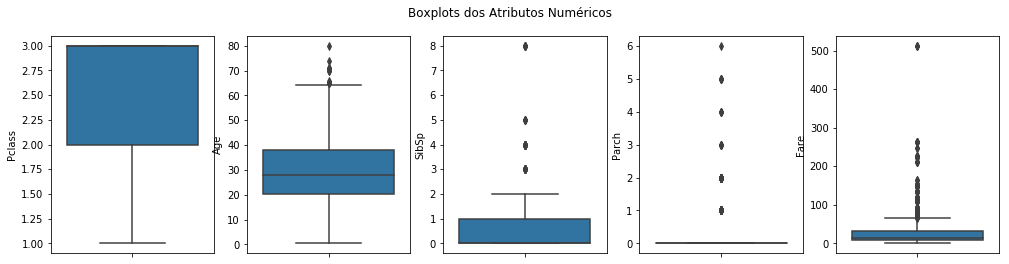

In [14]:
fig, ax = plt.subplots(ncols=len(numericos), nrows=1)
plt.suptitle("Boxplots dos Atributos Numéricos")

# Gráfico para cada atributo numérico
for i in range(0, len(numericos)):
    feature = numericos[i]
    sns.boxplot(dataset[feature], ax=ax[i], orient='vertical')

Os boxplots acima mostra ainda mais claramente a existência de outliers para Age, SibSp, Parch e Fare, principalmente para as 3 últimas. Em etapas posteriores, pode ser que seja necessário realizar algum tratamento nas instâncias que apresentam esse tipo de comportamento.

### Visualizar distribuição dos dados (atributos numéricos)

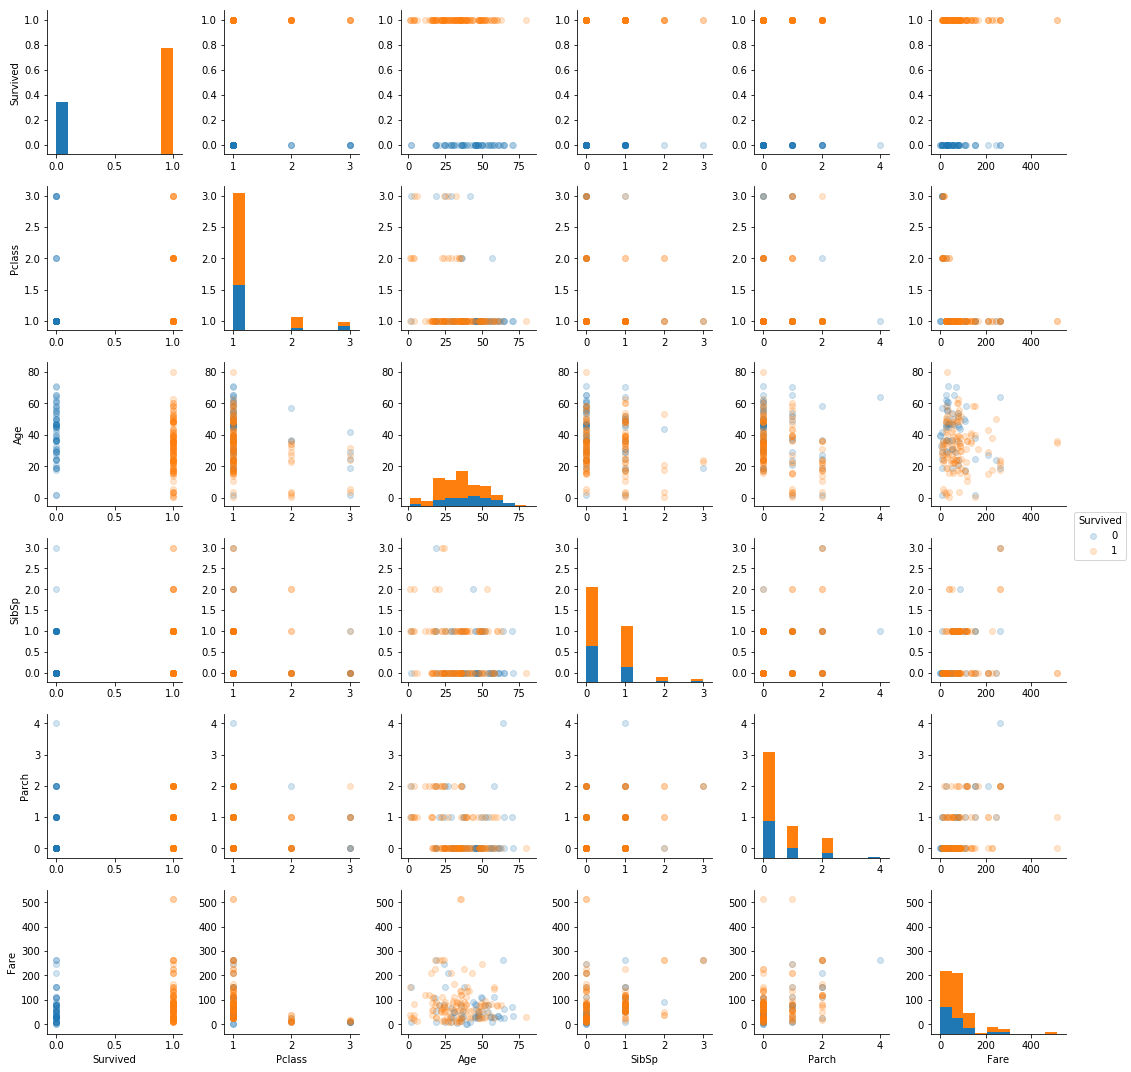

In [15]:
# Obrigatório instâncias com algum valor nulo
sns.pairplot(dataset.dropna(), hue='Survived', kind='reg', plot_kws={'scatter_kws': {'alpha': 0.2}, 'fit_reg': False})

Ao analisar os gráficos acima, pode-se perceber:
- As classes (0 ou 1 para Survived) estão desbalanceadas
- Os gráficos de dispersão não diferenciam muito bem os indivíduos de cada classe. Isso é feito com maior precisão pelos gráficos de barra

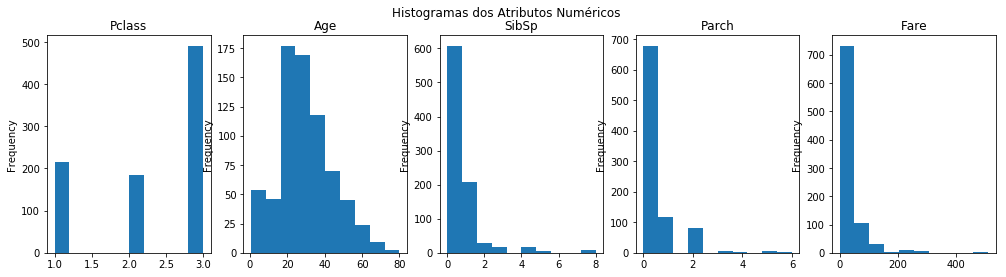

In [16]:
fig, ax = plt.subplots(ncols=len(numericos), nrows=1)
plt.suptitle("Histogramas dos Atributos Numéricos")

# Histograma para cada atributo numérico
for i in range(0, len(numericos)):
    feature = numericos[i]
    ax[i].set_title(feature)
    dataset[feature].plot(kind='hist', ax=ax[i])

Analisando as distribuições, temos que:
- Existiam mais passageiros na terceira classe do que nas outras 2
- A variável Age é a que mais se aproxima de uma Distribuição Normal
- SibSp, Parch e Fare possuem, em sua maioria, valores pequenos

### Visualizar distribuição dos dados (atributos categóricos)

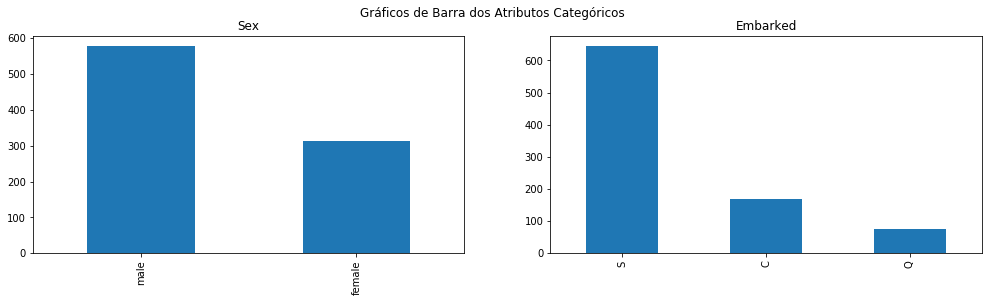

In [17]:
fig, ax = plt.subplots(ncols=len(categoricos), nrows=1)
plt.suptitle("Gráficos de Barra dos Atributos Categóricos")

# Gráfico para cada atributo categórico
for i in range(0, len(categoricos)):
    feature = categoricos[i]
    ax[i].set_title(feature)
    dataset[feature].value_counts().plot(kind='bar', ax=ax[i])

Existiam mais homens do que mulheres a bordo e a maioria dos passageiros embarcaram em "S" (Southampton)

### Visualizar dados em 2D
Considerando apenas os atributos numéricos Pclass, Age, SibSp, Parch e Fare.

In [18]:
# Reduzir dados para 2 dimensões com Análise de Componentes Principais (PCA)
pca = PCA(2)

datasetPCA = pca.fit_transform((dataset.dropna())[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
datasetPCA = pd.DataFrame({'pc1': datasetPCA[:, 0], 'pc2': datasetPCA[:, 1], 'class': dataset.dropna()['Survived'] })

datasetPCA.head()

,class,pc1,pc2
1,1,-7.443713,2.183068
3,1,-25.563961,-1.175732
6,0,-27.179017,17.798711
10,1,-61.344290,-32.919346
11,1,-52.565286,21.296473


In [19]:
# Verificar a variância explicada por cada componente
total =  np.cumsum(pca.explained_variance_ratio_)[1]
pca.explained_variance_ratio_

array([ 0.95989253,  0.0399373 ])

In [20]:
print("Os 2 componentes principais criados pelo PCA conseguem explicar", total * 100, "% da variância das variáveis numéricas.")

Os 2 componentes principais criados pelo PCA conseguem explicar 99.9829828924 % da variância das variáveis numéricas.


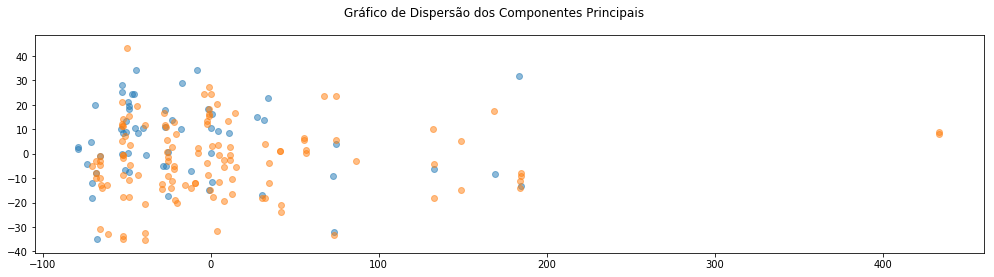

In [21]:
# Mostrar o gráfico de dispersão dos 2 componentes
plt.suptitle("Gráfico de Dispersão dos Componentes Principais")
plt.scatter(x=datasetPCA[datasetPCA['class'] == 0]['pc1'], y=datasetPCA[datasetPCA['class'] == 0]['pc2'], alpha=0.5)
plt.scatter(x=datasetPCA[datasetPCA['class'] == 1]['pc1'], y=datasetPCA[datasetPCA['class'] == 1]['pc2'], alpha=0.5)

### Calcular correlações

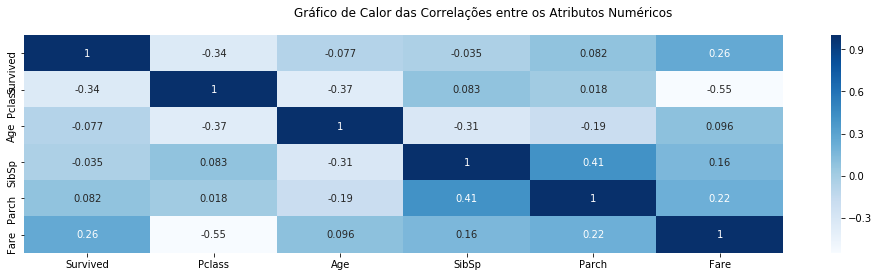

In [22]:
# Somente atributos numéricos são considerados
plt.suptitle("Gráfico de Calor das Correlações entre os Atributos Numéricos")
sns.heatmap(dataset.corr(), annot=True, cmap='Blues')

O gráfico de calor mostra que as variáveis mais correlacionadas são Pclass e Fare (negativamente) e SibSp e Parch (positivamente).

### Análise comparativa

#### Homens x Mulheres

In [23]:
# Porcentagem de sobrevivência de homens
totalHomens = dataset.loc[dataset['Sex'] == 'male', 'Survived'].count()
(dataset.loc[dataset['Sex'] == 'male', 'Survived'].value_counts() / totalHomens) * 100

0    81.109185
1    18.890815
Name: Survived, dtype: float64

In [24]:
# Porcentagem de sobrevivência de mulheres
totalMulheres = dataset.loc[dataset['Sex'] == 'female', 'Survived'].count()
(dataset.loc[dataset['Sex'] == 'female', 'Survived'].value_counts() / totalMulheres) * 100

1    74.203822
0    25.796178
Name: Survived, dtype: float64

#### Crianças x adultos

In [25]:
# Porcentagem de sobrevivência de crianças (< 17 anos)
totalCriancas = dataset.loc[dataset['Age'] < 17, 'Survived'].count()
(dataset.loc[dataset['Age'] < 17, 'Survived'].value_counts() / totalCriancas) * 100

1    55.0
0    45.0
Name: Survived, dtype: float64

In [26]:
# Porcentagem de sobrevivência de adultos (> 17)
totalAdultos = dataset.loc[dataset['Age'] > 17, 'Survived'].count()
(dataset.loc[dataset['Age'] > 17, 'Survived'].value_counts() / totalAdultos) * 100

0    61.896839
1    38.103161
Name: Survived, dtype: float64

#### 1º Classe x 2º Classe x 3º Classe

In [27]:
# Porcentagem de sobrevivência na primeira classe
total1classe = dataset.loc[dataset['Pclass'] == 1, 'Survived'].count()
(dataset.loc[dataset['Pclass'] == 1, 'Survived'].value_counts() / total1classe) * 100

1    62.962963
0    37.037037
Name: Survived, dtype: float64

In [28]:
# Porcentagem de sobrevivência na segunda classe
total2classe = dataset.loc[dataset['Pclass'] == 2, 'Survived'].count()
(dataset.loc[dataset['Pclass'] == 2, 'Survived'].value_counts() / total2classe) * 100

0    52.717391
1    47.282609
Name: Survived, dtype: float64

In [29]:
# Porcentagem de sobrevivência na terceira classe
total3classe = dataset.loc[dataset['Pclass'] == 3, 'Survived'].count()
(dataset.loc[dataset['Pclass'] == 3, 'Survived'].value_counts() / total3classe) * 100

0    75.763747
1    24.236253
Name: Survived, dtype: float64